In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def MSN(a,b,c,d,maxTime,dt):
    
    t=np.linspace(0., maxTime, num=int(maxTime/dt),endpoint=False)   
    v=-65
    resultv=[v]
    u=-10
    resultu=[u]
    
    for i in range (len(t)-1):
        v = v + (0.04*v**2 + 5*v + 140 - u +4)*dt
        u = u + (a*(b*v-u))*dt
        resultv.append(v)
        resultu.append(u)
        
        if v >= 30:
            v = c
            u = u+d

    #return resultv , resultu
                 
                  
    plt.xlabel('Temps (ms)')
    plt.ylabel('mV')
    plt.grid(color='grey', linestyle='--', linewidth=0.5)
    plt.plot(t,resultv,linewidth=1,label='Potentiel',color='green')
    plt.plot(t,resultu,color='blue',linewidth=1,label='Récupération')    
    plt.title('Valeur de c nulle',fontsize = 10)
    plt.legend(loc="upper right")
    #plt.savefig('Valeur de c nulle',dpi=1000)

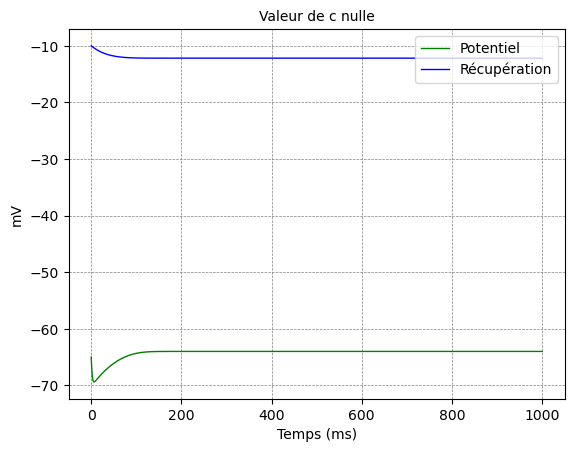

In [30]:
MSN(0.02,0.19,-65,8,1000,0.1)

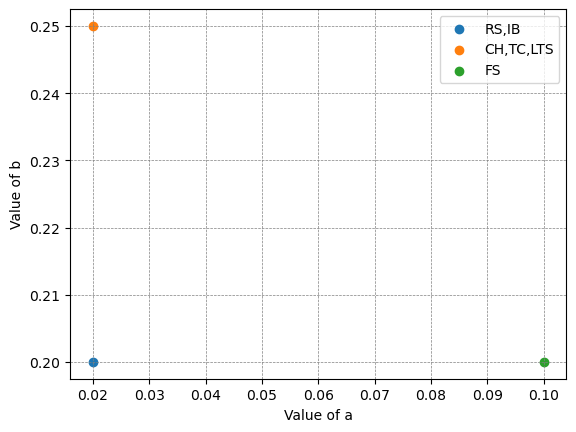

In [31]:
plt.xlabel('Value of a')
plt.ylabel('Value of b')
plt.scatter(0.02, 0.2, label='RS,IB')
plt.scatter(0.02, 0.25, label='CH,TC,LTS')
plt.scatter(0.1, 0.2, label='FS')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.legend(loc="upper right")
#plt.savefig('Different values of parameters a,b',dpi=1000)
plt.show()

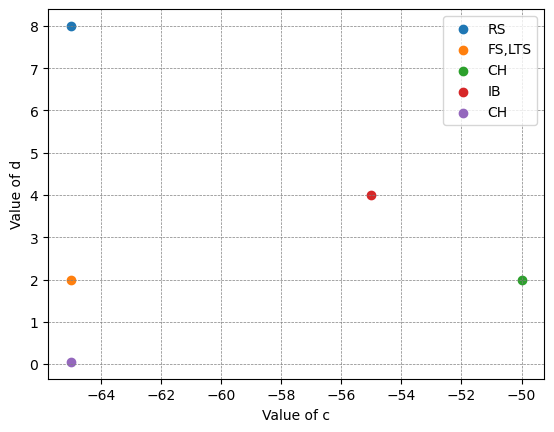

In [32]:
plt.xlabel('Value of c')
plt.ylabel('Value of d')
plt.scatter(-65, 8, label='RS')
plt.scatter(-65, 2, label='FS,LTS')
plt.scatter(-50, 2, label='CH')
plt.scatter(-55, 4, label='IB')
plt.scatter(-65, 0.05, label='CH')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.legend(loc="upper right")
plt.savefig('Different values of parameters c,d',dpi=1000)
plt.show()

In [33]:
# Ratios de transmissions fonctions annexes

def alpha_m(V):
    return 0.1*(V+35)/(1-np.exp(-0.1*(V+35)))

def alpha_n(V):
    return 0.01*(V+50)/(1-np.exp(-0.1*(V+50)))

def alpha_h(V):
    return 0.07*np.exp(-0.05*(V+60))


def betha_m(V):
    return 4*np.exp(-0.0556*(V+60))

def betha_n(V):
    return 0.125*np.exp(-0.0125*(V+60))

def betha_h(V):
    return 1/(1+np.exp(-0.1*(V+30)))


# Fonctions initiales m,n,h

def m_infini(V):
    return alpha_m(V)/(alpha_m(V)+betha_m(V))

def n_infini(V):
    return alpha_n(V)/(alpha_n(V)+betha_n(V))

def h_infini(V):
    return alpha_h(V)/(alpha_h(V)+betha_h(V))

In [35]:
def HH(G_Na,G_k,G_L,E_Na,E_k,V_L,C,I_e,maxTime,dt):
    
    t=np.linspace(0., maxTime, num=int(maxTime/dt),endpoint=False)
    
    V=V_L
    resultv=[V]
    
    m=m_infini(V_L)
    resultm=[m]
    
    n=n_infini(V_L)
    resultn=[n]
    
    h=h_infini(V_L)
    resulth=[h]
    
    
    for i in range (len(t)-1):
        
        V = V + (1/C)*(-G_L*(V-V_L)-G_Na*(m**3)*h*(V-E_Na)-G_k*(n**4)*(V-E_k)+I_e)*dt
        m = m + (alpha_m(V)*(1-m)-betha_m(V)*m)*dt
        n = n + (alpha_n(V)*(1-n)-betha_n(V)*n)*dt
        h = h + (alpha_h(V)*(1-h)-betha_h(V)*h)*dt
        resultv.append(V)
        resultm.append(m)
        resultn.append(n)
        resulth.append(h)

    #return resultv , resultu
                 
                  
    plt.xlabel('Temps (ms)')
    plt.ylabel('Potentiel (mV)')
    plt.grid(color='grey', linestyle='--', linewidth=0.5)
    plt.plot(t,resultv,linewidth=1,label='Potentiel',color='green')
    #plt.plot(t,resultm,color='blue',linewidth=1,label='m') 
    #plt.plot(t,resultn,color='red',linewidth=1,label='n')
    #plt.plot(t,resulth,color='yellow',linewidth=1,label='h')
    plt.title('Modèle de Hodgkin-Huxley',fontsize = 10)
    plt.legend(loc="upper right")
    plt.savefig('HH graphe',dpi=1000)
    #plt.plot(t,resultv,linewidth=1,label='Potentiel',color='green')
    #plt.savefig('HH canaux',dpi=1000)

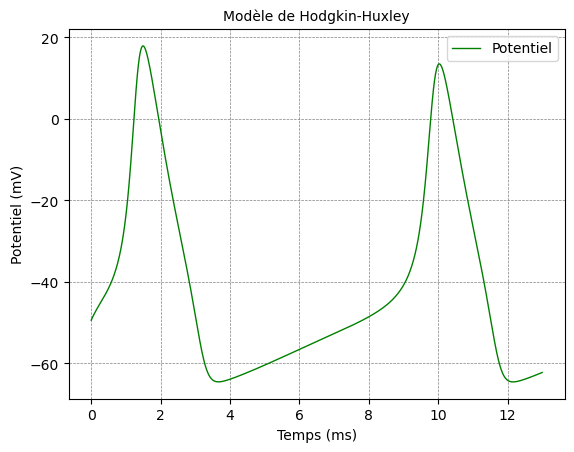

In [36]:
HH(1.2,0.36,0.003,55.17,-72.14,-49.42,0.01,0.5,13,0.01)